In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pystan

%matplotlib inline
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
sns.set_context("notebook")
plt.style.use('dark_background')
plt.rcParams["font.size"] = 18
np.random.seed(123)

In [9]:
df = pd.read_csv('./data/ch6_1_3.csv', header=None)
df.columns = ["data"]

In [22]:
stan_model = """
    data{
        int N;
        real X[N];
    }
    
    parameters{
        real mu;
        real<lower=0> sigma;
    }
    
    model{
        for(n in 1:N){
            X[n] ~ normal(mu, sigma);
        }
    }
    
    generated quantities{
        real epsilon;
        real<lower=0, upper=1> phi;
        
        epsilon <- mu + 0.675 * sigma;
        phi <- 1 - normal_cdf(epsilon, 805, 10);

    }
"""

In [23]:
sm = pystan.StanModel(model_code = stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ceb37e16c1fa4845768dda906995a06a NOW.


In [24]:
stan_data = {"N": df.shape[0], "X": df['data']}

In [25]:
fit = sm.sampling(data=stan_data, iter=11000, warmup=1000, chains=3, seed=1234)

In [26]:
fit

Inference for Stan model: anon_model_ceb37e16c1fa4845768dda906995a06a.
3 chains, each with iter=11000; warmup=1000; thin=1; 
post-warmup draws per chain=10000, total post-warmup draws=30000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu      786.15    0.03   3.64 778.88 783.79 786.18 788.51 793.24  16979    1.0
sigma    16.03    0.02   2.86  11.59  14.02  15.64  17.59  22.75  17527    1.0
epsilon 796.96    0.03   4.07 789.78 794.21 796.67 799.44 805.77  17297    1.0
phi       0.77  9.9e-4   0.12   0.47   0.71    0.8   0.86   0.94  14923    1.0
lp__     -61.9  9.9e-3   1.06 -64.75  -62.3 -61.57 -61.15 -60.88  11485    1.0

Samples were drawn using NUTS at Sun Aug 12 08:31:15 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [27]:
la = fit.extract(permuted=True) # サンプル列
names = fit.model_pars #パラメーター名

/Users/yugi/.pyenv/versions/anaconda-4.0.0/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


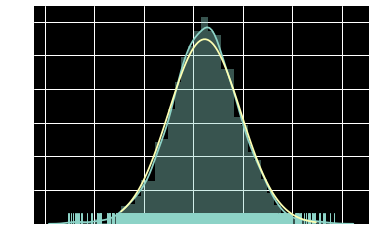

In [28]:
from scipy.stats import norm, gamma
u = la['mu'].mean()
s = la['mu'].std()
sns.distplot(la['mu'][:5000], kde=True,rug=True, norm_hist=False, bins=40)
x = np.linspace(norm.ppf(0.01, loc=u, scale=s), norm.ppf(0.999, loc=u, scale=s), 100)
plt.plot(x, norm.pdf(x=x, loc=u, scale=s))